In [1]:
# an approach of combining logistic regression with decision tree
# use logit function to get random or best coefficient of each feature then split
# then measure split goodness with entropy/impurity
# build tree on best split, take split dataset and repeat the process again
# till some criteria meets, like max depth or minimum point for split

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import data_viz as dviz
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# read data as dataframe
#data = "data/linear.csv"
data ="data/weight-height.csv"
#data = "data/3rd.csv"
df = pd.read_csv(data)
#df.variety.value_counts()

#next for iris only
# for iris only taking two class droping other
# df = df[df['variety'] != 'Setosa']
# #label encoding
# df['variety'].replace(["Virginica","Versicolor"], [1,0], inplace=True)

In [3]:
inp_df = df.drop(df.columns[-1], axis=1)
out_df = df.drop(df.columns[:-1], axis=1)
# scaler = StandardScaler()
# inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=0)

X_tr_arr = X_train
X_ts_arr = X_test
# df to np_array
y_tr_arr = y_train.values.ravel()
y_ts_arr = y_test.values.ravel()


In [4]:
# x_tr = pd.DataFrame(X_train, columns=['x1','x2'])
x = pd.concat([X_train, y_train], axis=1)

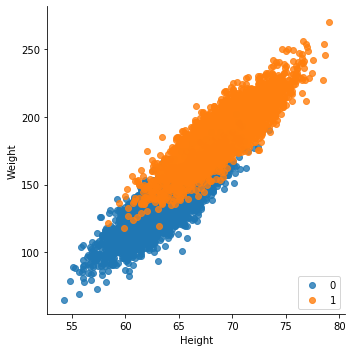

In [5]:
dviz.DDScatterDFSns(0, 1, x)

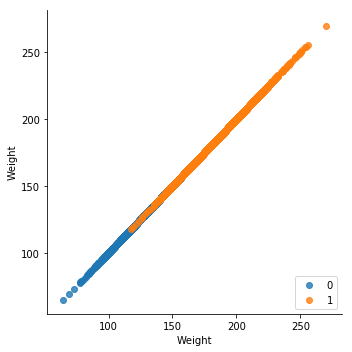

In [779]:
import seaborn as sns
# assume last column is dependable variable
sns.lmplot(x=[key for key in x.columns[[1]]][0], y=[key for key in x.columns[[1]]][0], 
           data=x, fit_reg=False, hue=[key for key in x.columns[[-1]]][0], legend=False)

# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

In [780]:
clf = LogisticRegression()
clf.fit(X_tr_arr, y_tr_arr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [781]:
pred = clf.predict(X_tr_arr)
clf.score(X_ts_arr, y_ts_arr)
confusion_matrix(y_tr_arr, pred)
accuracy_score(y_tr_arr, pred)

0.9225

array([[3656,  332],
       [ 321, 3691]], dtype=int64)

0.918375

In [713]:
theta = np.append(clf.coef_, clf.intercept_)
theta
ones = np.ones(len(X_tr_arr))
ones = ones.reshape(1, -1)
with_one_combine = np.concatenate((X_tr_arr, ones.T), axis=1)

#htheta(x) = x.theta or theta.T.X np.dot() is handling shape, is already in shape
#https://towardsdatascience.com/understanding-logistic-regression-step-by-step-704a78be7e0a
direction = with_one_combine.dot(theta)

array([ 0.00930987,  0.00858165, -1.45677389])

In [673]:
left_side = np.where(direction >= 0)
right_side = np.where(direction < 0)
len(left_side[0])
len(right_side[0])

0

800

In [720]:
X_tr_arr.values[0]

array([ 4.10248507, -8.72778782])

In [724]:
np.dot(X_tr_arr.values[1], clf.coef_.T)+clf.intercept_

array([-1.51415032])

In [644]:
direction[0]

-1.4097784041431036

In [649]:
-(np.log(-23))

c:\users\subash\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

In [ ]:
# check two class in each direction pos, neg


In [300]:
len(np.where(y_tr_arr[neg_side]== 1)[0])


3

In [ ]:
now save each split unpure subset again

In [243]:
inp_df.values[129]

array([-0.832144, -6.937963])

In [ ]:
clf = logit(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)

In [ ]:
# parameters
epochs = 1000
tree_depth = 4
min_pts = 5


In [ ]:
# split data in train and test
X_train, y_train, X_test, y_test = tts(df, split=0.7)



In [ ]:
# write a funciton to run 
def best_theta(dataset):
    # initilize algo here because it has to fit in every node
    logit_clf = logit()
    
    logit_clf.fit(X_train, y_train)
    
    return logit_clf.coef_, logit.intercept_

In [ ]:
# with coefficent split dataset into two sub data and repeat this process again

def measure_error(dataset):
    # get theta
    [theta] = best_theta(dataset)
    
    # find total entropy of given dataset
    total_entropy = entropy()
    # find check its error with ture value
    pos_ent = entropy()
    neg_ent = entropy()
    
    # information gain
    gain = total_entropy - all entropy
    
    return gain, theta

In [ ]:
# check for best gain and split the data
there is no reason to find entropy because we already got best coeff and intercept from graident descent 
now we can diectly split data with that vlaues

a bit hard or find a way of what? because there is no random point selection because there is no reason to check everytime
or I hava to check in depth how it works. or There is random way of finding theta with in gradient descend 

call here split data build the tree repeat this process whole again until some criteria
